In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
dfs= {}
indexes= {}
k=0
w_diff=[]

def IndexAndDf(df,party_name,i=k):
        df_party = df[df.party==party_name]
        df_party = df_party.reset_index()
        df_party['index']=df_party.index
        women_1 = df_party[df_party.gender=='Woman']
        women_index = women_1.index[0]
        dfs[i] = df_party
        indexes[i] = women_index
        return women_index
        
def AvgDiffNthPlace(n,df_dictionary=dfs):
    diff_list = []
    for index in df_dictionary:
        df = df_dictionary[index]
        if df.shape[0] > n:
            prev = df['votes_percent'][n-1]
            nth = df['votes_percent'][n]
            diff = prev - nth
            diff_list.append(diff)
    return sum(diff_list)/len(diff_list)

def Diff(df,index):
    prev=df['votes_percent'][index-1]
    woman = df['votes_percent'][index]
    diff = prev - woman
    diff_list.append(diff)
    return diff

In [138]:
for j in range(41):
    path = f'X:\Data Analysis\Wybory 2023\okreg_{j+1}_utf8.csv'
    dane = pd.read_csv(path,sep=";")
    df = pd.DataFrame(dane)
    df = df.drop(labels=['Nr okręgu','Liczba uwzględnionych komisji','Liczba komisji'], axis=1)
    column_names = list(df.columns.values)
    parties = []
    parties2 = []
    df2 = {'candidate':[], 'party':[], 'votes':[],'gender':[]}
    
    for party in parties:
        if parties.count(party)>2 and party not in parties2:
            parties2.append(party)
            
    for value in column_names:
        find=value.find(' KW ')
        if find == -1:
            find=value.find(' KKW ')
        name_surname=value[0:find-2]
        party_=value[find:].strip()
        df2['candidate'].append(name_surname)
        df2['party'].append(party_)
        name=name_surname.split()[1]
        if name[-1]=='a':
            gender='Woman'
        else:
            gender="Man"
        df2['gender'].append(gender)

    for i in range(len(df.axes[1])):
        df2['votes'].append(df.iloc[0,i])
    final_df=pd.DataFrame.from_dict(df2)
    parties=final_df.party.unique()
    parties=np.delete(parties, -1)
        
    for party in parties:
        IndexAndDf(final_df,party,k)
        k+=1


In [139]:
final_indexes = []
final_dfs = []
diff_list=[]

for i in range(len(indexes)):
    if indexes[i]>1:
        final_indexes.append(i)
for index in final_indexes:
    final_dfs.append(dfs[index])
for index in dfs:
    df=dfs[index]
    df['votes_percent'] = df['votes']/sum(df['votes'])*100
    
for df in final_dfs:
    df['votes_percent']=df['votes']/sum(df['votes'])*100

for i, index in enumerate(final_indexes):
    Diff(final_dfs[i],indexes[index])
    

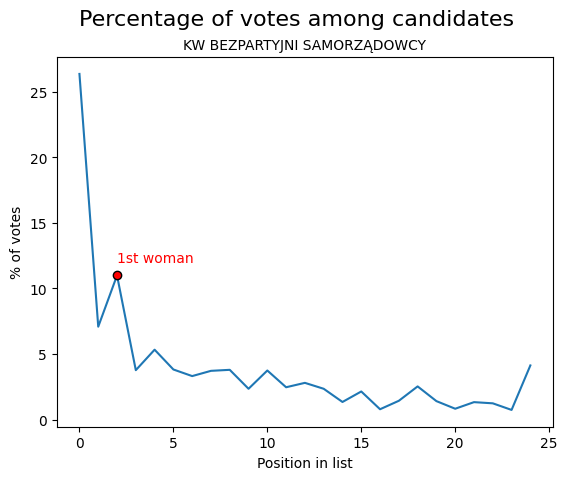

In [140]:
i=final_indexes[11]
j=indexes[i]
plot_df = dfs[i]
party=plot_df['party'][0]
plt.plot(plot_df.index,plot_df.votes_percent,marker='o',markevery=[j],mec = 'black', mfc = 'red')
plt.title(f"{plot_df['party'][0]}",fontsize=10)
plt.suptitle("Percentage of votes among candidates", fontsize=16)
plt.xlabel("Position in list")
plt.ylabel("% of votes")
plt.annotate("1st woman", (j,plot_df.votes_percent[j]+1), color='red')
plt.show()

In [141]:
avg_dif = round(sum(diff_list)/len(diff_list),2)
avg_dif

1.37

In [132]:
for index in final_indexes:
    w_index = indexes[index]
    difference = Diff(dfs[index],w_index)-AvgDiffNthPlace(w_index,dfs)
    print(f'{Diff(dfs[index],w_index)} - {AvgDiffNthPlace(w_index,dfs)}')
    w_diff.append(difference)
    
avg = sum(w_diff)/len(w_diff)
avg = round(avg,2)

14.445453910126494 - 24.534249446250502
0.8858741984506455 - 4.28148952238047
-9.512731845331656 - 4.28148952238047
0.4186339313818068 - 0.34988590003235215
-1.0674931129476581 - 4.28148952238047
8.649151360148803 - 24.534249446250502
15.032885887362356 - 24.534249446250502
6.1043228257521305 - 2.771404736741659
16.68748884526147 - 24.534249446250502
-9.116146458583435 - 4.28148952238047
17.190568629454305 - 24.534249446250502
-1.3042193157466926 - 4.28148952238047
14.890510948905112 - 24.534249446250502
-0.36431004898913244 - 4.28148952238047
-3.1439415396816397 - 4.28148952238047
18.99595948414236 - 4.28148952238047
-1.316173466409852 - 2.771404736741659
11.114737258846315 - 24.534249446250502
-3.905645784996133 - 4.28148952238047
4.131280542771741 - 4.28148952238047
4.3788326389306 - 24.534249446250502
2.76057490067773 - 1.0963833562099574
29.336752373691873 - 24.534249446250502
0.2610208816705337 - 0.49273526217517055
3.0175552139794526 - 24.534249446250502
3.892866469728368 - 4.28

In [134]:
avg

-2.86